<a href="https://colab.research.google.com/github/AJ-21cm/AJ-21cm/blob/main/Congestion_paper_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Computing the congestion level

In [ ]:
%%time
congestion=[]
for i in range(10):
  a=np.random.randint(1,11,10)
  congestion.append(a)
b=np.array(congestion)
b=np.where(b==10,1,0)
print(b)
s=np.zeros(10)
for i in b:
  s+=i
s

#Adjacency matrix

In [ ]:
def adjacency_list_nodeDegree(G,nodes):
  G=
  adjacency_list={}
  for i in range(nodes):
     k=[]
     for j in G.neighbors(i):
         if i!=j:
           k.append(j)
     adjacency_list[i]=k
  node_Degree_dict={i:len(adjacency_list[i]) for i in adjacency_list}
  return adjacency_list,node_Degree_dict

In [ ]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 6.1 MB/s 


In [ ]:
import igraph as ig

In [ ]:
class Queue_list:
    def __init__(self):
        self.items = []

    def is_empty(self):
        return self.items == []

    def enqueue(self, array_data):
      for i in array_data:
        self.items.append(i)

    def dequeue(self):
        return self.items.pop(0)
    def show(self):
       return self.items
    def queue_size(self):
       return len(self.items)

q = Queue_list()
q.is_empty()
q.enqueue([2])
q.show()
q.queue_size()

1

In [ ]:
class Queue_array:
    def __init__(self):
        self.items = np.array([],dtype=int)

    def is_empty(self):
        return self.items ==np.array([])

    def enqueue(self, array_data):
        self.items=np.append(self.items,array_data,axis=0)
        return self.items
    def dequeue(self):
        self.items=np.delete(self.items,0,axis=0)
        return self.items
    def show(self):
       return self.items
    def queue_size(self):
       return np.shape(self.items)[0]

In [ ]:
q = Queue_array()
q.is_empty()
q.enqueue([2,3,5,6,7,88])
q.show(),q.queue_size()

(array([ 2,  3,  5,  6,  7, 88]), 6)

In [ ]:
q.dequeue()
q.show(),q.queue_size()

(array([ 5,  6,  7, 88]), 4)

In [ ]:
np.shape(np.array([2,3,4,5]))[0]

4

In [ ]:
nodes=5
G=nx.barabasi_albert_graph(nodes,m=2,seed=2)
M=10

m=[np.random.randint(1,9) for i in range(5)]
len(m),m

(5, [6, 6, 8, 2, 8])

{(0, 1): 5, (0, 2): 9, (0, 3): 9, (0, 4): 7, (1, 3): 5, (1, 4): 8}

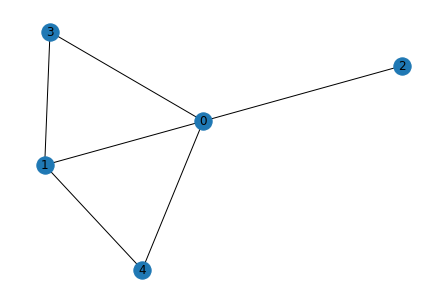

In [ ]:
nx.draw(G,with_labels=True)
l=list(G.edges(3))
l
neig=[n for n in G.neighbors(2)]
edge_length_dic={i:np.random.randint(2,10) for i in G.edges()}
edge_length_dic

#Degree biased random walk transistion probability

In [ ]:
def next_pos(G,pos,alpha):
  neig=[n for n in G.neighbors(pos)]
  Deg_arr=np.array([G.degree(i) for i in neig],dtype=float)
  Deg_arr_=np.power(Deg_arr,alpha)
  prob=[j/sum(Deg_arr_) for j in Deg_arr_]
  next_pos=np.random.choice(neig,size=None, replace=True, p=prob)
  return next_pos

In [ ]:
neig=[n for n in G.neighbors(10)]
print(neig)
Deg_arr=np.array([G.degree(i) for i in neig],dtype=float)
Deg_arr_=np.power(Deg_arr,-4)
print(Deg_arr,Deg_arr_)
prob=[j/sum(Deg_arr_) for j in Deg_arr_]
print(prob)
next_pos=np.random.choice(neig, size=None, replace=True, p=prob)
print(next_pos)

[1, 7, 16]
[12.  8.  2.] [4.82253086e-05 2.44140625e-04 6.25000000e-02]
[0.0007680122881966111, 0.0038880622089953443, 0.9953439255028081]
16


#Distance biased random walk transition probability

In [ ]:
def next_pos(G,pos,edge_length_dict,alpha):
  neig=[n for n in G.neighbors(pos)]
  #Deg_arr=np.array([G.degree(i) for i in neig],dtype=float)
  edges_connected=[(pos,i) if i>pos else (i,pos) for i in neig]
  edge_weight=np.array([edge_length_dict[j] for j in edges_connected],dtype=float)
  edge_weight_biased=np.power(edge_weight,alpha)
  prob=[j/sum(edge_weight_biased) for j in edge_weight_biased]
  next_pos=np.random.choice(neig,size=None, replace=True, p=prob)
  return next_pos

In [ ]:
pos=0
alpha=-2
neig=[n for n in G.neighbors(pos)]
print(neig)
#Deg_arr=np.array([G.degree(i) for i in neig],dtype=float)
edges_connected=[(pos,i) if i>pos else (i,pos) for i in neig]
print(edges_connected)
edge_weight=np.array([edge_length_dic[j] for j in edges_connected],dtype=float)
print(edge_weight)
edge_weight_biased=np.power(edge_weight,alpha)
print(edge_weight_biased)
prob=[j/sum(edge_weight_biased) for j in edge_weight_biased]
print(prob,sum(prob))
next_pos=np.random.choice(neig,size=None, replace=True, p=prob)
print(next_pos)

[1, 2, 3, 4, 5, 6, 8, 12, 14, 17]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 8), (0, 12), (0, 14), (0, 17)]
[6. 9. 9. 4. 8. 2. 9. 9. 3. 9.]
[0.02777778 0.01234568 0.01234568 0.0625     0.015625   0.25
 0.01234568 0.01234568 0.11111111 0.01234568]
[0.05253557095950383, 0.02334914264866837, 0.02334914264866837, 0.11820503465888361, 0.029551258664720904, 0.47282013863553446, 0.02334914264866837, 0.02334914264866837, 0.2101422838380153, 0.02334914264866837] 1.0
3


#Available space biased random walk transistion probability

In [ ]:
occp_number_nodewise={}
for i in range(nodes):
  occp_number_nodewise[i]=np.random.randint(1,9)

In [ ]:
occp_number_nodewise

{0: 3, 1: 6, 2: 8, 3: 8, 4: 6}

In [ ]:
def function_f(m,M,alpha):
  x=m/M #simple function f(x)=x
  return x**alpha
def function_g(m,M,sigma):
  x=1-(m/M)
  return (x)**sigma
def next_pos(G,pos,occp_number_nodewise,M,alpha,sigma):
  neig=[n for n in G.neighbors(pos)]
  degree=len(neig)
  occup_num_Curr_node=occp_number_nodewise[pos]
  #Deg_arr=np.array([G.degree(i) for i in neig],dtype=float)
  occp_number=[occp_number_nodewise[i] for i in neig]
  prob=np.array([(1/degree)*(function_f(occup_num_Curr_node,M=10,alpha=2))*(function_g(i,M=10,sigma=2)) for i in occp_number],dtype=float)
  norm_prob=[j/sum(prob) for j in prob]
  next_pos=np.random.choice(neig,size=None, replace=True, p=norm_prob)
  return next_pos

In [ ]:
k=4
for i in range(10000):
  km=next_pos(G,k,occp_number_nodewise,10,1,2)
  occp_number_nodewise[k]=occp_number_nodewise[k]-1
  occp_number_nodewise[km]=occp_number_nodewise[km]+1
  k=km

In [ ]:
occp_number_nodewise

{0: 1, 1: 7, 2: 8, 3: 8, 4: 7}

In [ ]:
G.degree(1)

3

In [ ]:
pos=0
neig=[n for n in G.neighbors(pos)]
print(neig)
degree=len(neig)
print(degree)
occup_num_Curr_node=occp_number_nodewise[pos]
print(occup_num_Curr_node)
#Deg_arr=np.array([G.degree(i) for i in neig],dtype=float)
occp_number=[occp_number_nodewise[i] for i in neig]
print(occp_number)
print(function_f(occup_num_Curr_node,M=10,alpha=2),function_g(i,M=10,sigma=2))
prob=np.array([(1/degree)*(function_f(occup_num_Curr_node,M=10,alpha=2))*(function_g(i,M=10,sigma=2)) for i in occp_number],dtype=float)
print("p",prob)
norm_prob=[j/sum(prob) for j in prob]
print(norm_prob,sum(norm_prob))
next_pos=np.random.choice(neig,size=None, replace=True, p=norm_prob)
print(next_pos)

#Improved routing strategies for data traffic in scale-free network
#Abstract
$\hspace{1cm}$
We study the information packet routing process in scale-free
networks by mimicking Internet traffic delivery. We incorporate both the global
shortest paths information and local degree information of the network in the
dynamic process, via two tunable parameters, α and β, to guide the packet
routing. We measure the performance of the routing method by both the average
transit times of packets and the critical packet generation rate (above which
packet aggregation occurs in the network). We found that the routing strategies
which integrate ingredients of both global and local topological information of
the underlying networks perform much better than the traditional shortest path
routing protocol taking into account the global topological information only.
Moreover, by doing comparative studies with some related works, we found that
the performance of our proposed method shows universal efficiency characteristic
against the amount of traffic.
#Model
*  In order to have a realistic picture of communication, we limit the ability of nodes to deliver packets and assume that, at each time step, each node i can deliver at most $1+k_i^θ$ packets one step toward their destinations, where capacity parameter $\theta ≥ 0$. For θ = 0, all nodes have the same ability irrespective of their link degree, and θ > 0 means larger degree nodes with stronger capacity.
*   At the beginning of the delivering process, each node creates $m_0$ information packets with destinations being randomly selected among the remaining N−1 nodes. Thus, the total number of information packets is $N_p = Nm_0$. In subsequent time steps, the packet transmission on the network is implemented by a parallel update algorithm. Each node i processes at most $1 + k_i^θ$ in its queue based on the FIFO rule and selects the next routing nodes for the packets according to the routing strategy given
below.
*  The SP routing algorithm is not optimal for heterogeneous
networks due to the presence of high betweenness nodes. On the other hand however,the SP routing provides a benchmark for any newly proposed routing protocol. Only those protocols superior to SP routing are of significant and practical importance. To allow a direct comparison with the SP routing, we propose a routing method where the information of the shortest paths among the nodes matters considerably, that is, at each time step, all the packets move from their current position, i, to the next node in their
path, j, with a probability $Q_{ij}$ defined as
$ Q_{ij} = \frac{k_j^{\alpha}exp(-β(d_{it}-d_{jt}-1))}{\sum_{l ∈ Ω_i}k_l^{\alpha}exp(-β(d_{it}-d_{lt}-1))}$
where $\Omega_i$ is the set of neighboring nodes of i, $k_j$ is the degree of node j, and $d_{it}$ is the the shortest path between i and t, $\alpha \in (-∞, ∞), β ∈ [0, ∞)$. For α = 0.0 and β → ∞, we
recover the SP routing strategy. With the decreasing of β to zero, the global topological
information involved in the routing protocol is reduced. It is worth noting that when
β = 0, we implement exactly a local routing protocol for the packet traffic

* To determine how the above routing strategy influences the efficiency of the
information traffic, we implement different realizations of the dynamics for several values of $N_p$ and $\theta$ by varying $\alpha$ and $\beta$ smoothly, and monitor the relevant quantity T( the
average time it takes for all Np packets to travel from their sources to their destinations). To allow a direct comparison with the efficiency of the SP routing, we summarize our
simulation results in figure 1, where the relative difference between the average transmit
times of our strategies and that for the SP routing, $\frac{<T_{sp}>−<T>}{<T_{sp}}>$, is shown, varying
the values of α and β for five combinations of Np and θ.


In [ ]:
def Improved_routing(start,end,adjacency_list,SP_route_dict,alpha,beta):
   sp=SP_route_dict[(start,end)]
   prob=[i]


#Congestion phenmenon on network



In [ ]:
rejection_prob=0.5
dead_prob=0.5
desti_node=0
prob_creating_walker=0.5

In [ ]:
def creat_particles_probabilistically(nodes,p,Each_node_queue) :
    for node in range(nodes):
          rnum1=np.random.rand(1)[0]
          if rnum1<=p:
            create_particle=np.random.randint(0,nodes,1)[0]
            if create_particle !=node:
              Each_node_queue[node].enqueue([create_particle])
    return Each_node_queue

Defining the probabaility of generation of walkers on each node

In [ ]:
prob_gene={}
for i in range(nodes):
  prob_gene[i]=0.5

Generating walkers at time any time t

In [ ]:
Total_number_of_wal=sum([walkers_on_nodes[i] for i in walkers_on_nodes])
net_birth_prob=sum([prob_gene[i] for i in prob_gene])/nodes
Total_number_of_wal,net_birth_prob

(5, 0.5)

In [ ]:
%%time
node_capacity=10
Each_node_queue={}
Each_node_TimeS={}
walkers_on_nodes={}
for node in range(nodes):
      Each_node_queue[node]=Queue_list()
      Each_node_TimeS[node]=[]
      walkers_on_nodes[i]=0
for time in range(50):
  print("time",time)
  creat_particles_probabilistically(nodes,p,Each_node_queue)
  Each_node_queue_dummy={}
  for node in range(nodes):
      Each_node_queue_dummy[node]=Queue_list()
  for i in range(nodes):
    rnum1=np.random.rand(1)[0]
    if rnum1<=prob_gene[i]:
       Each_node_queue[i].enqueue([np.random.randint(0,nodes,1)[0]])
  for node in range(nodes):
    print("current node",node)
    print("main queue",[[i,Each_node_queue[i].show()] for i in range(nodes)])
    print("dummy",[[i,Each_node_queue_dummy[i].show()] for i in range(nodes)])
    if Each_node_queue[node].queue_size()>0:
      walker_out_dest=Each_node_queue[node].show()[0]
      neigbours=[i for i in G.neighbors(node)]
      print(neigbours)
      choosen_node=np.random.choice(neigbours,size=None,replace=True,p=None)
      print("chosen node",choosen_node)
      if Each_node_queue[choosen_node].queue_size()<=node_capacity:
        print("Not congested")
        if   choosen_node==walker_out_dest:
                print("destination reached",choosen_node,walker_out_dest)
                Each_node_queue[node].dequeue()
                print("walker destroyed")
        else:
                Each_node_queue[node].dequeue()
                Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])
                print("walker transfered",node,choosen_node)

      else:
        print("congested")
        rnum2=np.random.rand(1)[0]
        if rnum2<=rejection_prob:
          print("walker rejected")
          continue
        else:
          print("walker not rejected")
          if  choosen_node==walker_out_dest:
                Each_node_queue[node].dequeue()
                print("walker destroyed")
          else:
               Each_node_queue[node].dequeue()
               Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])
               print("walker transfered",node,choosen_node)
    else:
      print(node,"Node is empty")
      continue
    print("main queue",[[i,Each_node_queue[i].show()] for i in range(nodes)])
    print("dummy",[[i,Each_node_queue_dummy[i].show()] for i in range(nodes)])
  for node in range(nodes):
    Each_node_queue[node].enqueue(Each_node_queue_dummy[node].show())
    print("Final queue of node",node,Each_node_queue[node].show())
    Each_node_TimeS[node].append(Each_node_queue[node].queue_size())
    print(Each_node_TimeS[node])

time 0
current node 0
main queue [[0, [3]], [1, [3]], [2, [3]], [3, [4]], [4, [4]]]
dummy [[0, []], [1, []], [2, []], [3, []], [4, []]]
[1, 2, 3, 4]
chosen node 4
Not congested
walker transfered 0 4
main queue [[0, []], [1, [3]], [2, [3]], [3, [4]], [4, [4]]]
dummy [[0, []], [1, []], [2, []], [3, []], [4, [3]]]
current node 1
main queue [[0, []], [1, [3]], [2, [3]], [3, [4]], [4, [4]]]
dummy [[0, []], [1, []], [2, []], [3, []], [4, [3]]]
[0, 3, 4]
chosen node 4
Not congested
walker transfered 1 4
main queue [[0, []], [1, []], [2, [3]], [3, [4]], [4, [4]]]
dummy [[0, []], [1, []], [2, []], [3, []], [4, [3, 3]]]
current node 2
main queue [[0, []], [1, []], [2, [3]], [3, [4]], [4, [4]]]
dummy [[0, []], [1, []], [2, []], [3, []], [4, [3, 3]]]
[0]
chosen node 0
Not congested
walker transfered 2 0
main queue [[0, []], [1, []], [2, []], [3, [4]], [4, [4]]]
dummy [[0, [3]], [1, []], [2, []], [3, []], [4, [3, 3]]]
current node 3
main queue [[0, []], [1, []], [2, []], [3, [4]], [4, [4]]]
dummy [

NameError: ignored

In [ ]:
Each_node_TimeS[]

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1]

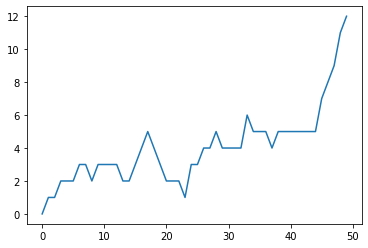

In [ ]:
plt.plot(Each_node_TimeS[4])

In [ ]:
np.random.randint(0,nodes,size=1)[0]

2

In [ ]:
#This is a general code, everything is probablistic
for i in range(1):
  node=np.random.randint(0,nodes)
  print(node)
  if walkers_on_nodes[node]>0:
    neigbours=[i for i in G.neighbors(node)]
    print(neigbours)
    choosen_node=np.random.choice(neigbours,size=None,replace=True,p=None)
    print("chosen node",choosen_node)
    if walkers_on_nodes[choosen_node]<=3:
      print("Not congested")
      if   choosen_node==desti_node:
              print("destination reached",choosen_node,desti_node)
              rnum3=np.random.rand(1)[0]
              if rnum3<=dead_prob:
                  walkers_on_nodes[choosen_node]=walkers_on_nodes[choosen_node]+0
                  walkers_on_nodes[node]=walkers_on_nodes[node]-1
                  print("walker destroyed")
              else:
                  walkers_on_nodes[choosen_node]=walkers_on_nodes[choosen_node]+1
                  walkers_on_nodes[node]=walkers_on_nodes[node]-1
                  print("walker transfered",node,choosen_node)
      else:
              walkers_on_nodes[choosen_node]=walkers_on_nodes[choosen_node]+1
              walkers_on_nodes[node]=walkers_on_nodes[node]-1
              print("walker transfered",node,choosen_node)

    else:
      print("congested")
      rnum2=np.random.rand(1)[0]
      if rnum2<=rejection_prob:
        print("walker rejected")
        continue
      else:
        walkers_on_nodes[node]=walkers_on_nodes[node]-1
        print("walker not rejected")
        if  choosen_node==desti_node:
              print("destination reached",choosen_node,desti_node)
              rnum3=np.random.rand(1)[0]
              if rnum3<=dead_prob:
                  walkers_on_nodes[choosen_node]=walkers_on_nodes[choosen_node]+0
                  print("walker destroyed")
              else:
                  walkers_on_nodes[choosen_node]=walkers_on_nodes[choosen_node]+1
                  print("walker transfered",node,choosen_node)
        else:
              walkers_on_nodes[choosen_node]=walkers_on_nodes[choosen_node]+1
              #walkers_on_nodes[node]=walkers_on_nodes[node]-1
              print("walker transfered",node,choosen_node)
  else:
    print(node,"Node is empty")

8
[0, 1, 14]
chosen node 1
Not congested
destination reached 1 1
walker transfered 8 1


In [ ]:
walkers_on_nodes

In [ ]:
neigbours=[i for i in G.neighbors(0)]
neigbours

[1, 2, 3, 4, 5, 6, 8, 12, 14, 17]

In [ ]:
n_1=3
node_capacity=10
dead_prob=0.5
prob_creating_walker=0.5
sigma=1
prob_gene={}
for i in range(nodes):
  prob_gene[i]=0.5

In [ ]:
def function_g(m,M,sigma):
  x=1-(m/M)
  return (x)**sigma
def adjacency_list_nodeDegree(G,nodes):
  adjacency_list={i:[j for j in G.neighbors(i)] for i in range(nodes)}
  node_Degree_dict={i:len(adjacency_list[i]) for i in adjacency_list}
  return adjacency_list,node_Degree_dict
def next_pos(adjacency___list,pos,occp_number_nodewise,node_capacity,sigma):
  neig=[n for n in adjacency___list[pos]]
  degree=len(neig)
  occp_number=[occp_number_nodewise[i] for i in neig]
  print("occupation numbers",occp_number)
  prob=np.array([(1/degree)*(function_g(i,node_capacity,sigma)) for i in occp_number],dtype=float)
  print("calculated probabilities",prob)
  if sum(prob)==0:
    return -1
  else:
    norm_prob=[j/sum(prob) for j in prob]
    next_pos=np.random.choice(neig,size=None, replace=True, p=norm_prob)
  return next_pos

In [ ]:
adjacency_list,node_Degree_dict =adjacency_list_nodeDegree(G,nodes)

NameError: ignored

In [ ]:
%%time
Each_node_queue={}
Each_node_TimeS={}
walkers_on_nodes={}
for node in range(nodes):
      Each_node_queue[node]=Queue_list()
      Each_node_TimeS[node]=[]
      walkers_on_nodes[node]=0

for time in range(100):
  print("time",time)
  walkers_on_nodes_dummy={}
  Each_node_queue_dummy={}
  Each_node_congested={}
  for node in range(nodes):
    Each_node_queue_dummy[node]=Queue_list()
    walkers_on_nodes_dummy[node]=Each_node_queue[node].queue_size()
    rnum1=np.random.rand(1)[0]
    if rnum1<=prob_gene[node] and Each_node_queue[node].queue_size()<node_capacity:
       Each_node_queue[node].enqueue([np.random.randint(0,nodes,1)[0]])
    Each_node_congested[node]=Each_node_queue[node].queue_size()/node_capacity
  Each_node_congested_={}
  for j in Each_node_congested:
    val=Each_node_congested[j]
    if val not in Each_node_congested_:
       Each_node_congested_[val]=[j]
    else:
      Each_node_congested_[val].append(j)
  for nodes_list in Each_node_congested_:
    for node in Each_node_congested_[nodes_list]:
      print("current node",node)
      print("main queue at starting",[[i,Each_node_queue[i].show()] for i in range(nodes)])
      print("dummy",[[i,Each_node_queue_dummy[i].show()] for i in range(nodes)])
      if Each_node_queue[node].queue_size()>0:
          if Each_node_queue[node].queue_size()<=n_1:
            for w in range(Each_node_queue[node].queue_size()):
                walker_out_dest=Each_node_queue[node].show()[0]
                choosen_node=next_pos(adjacency_list,node,walkers_on_nodes_dummy,node_capacity,sigma)
                print("chosen node",choosen_node)
                if choosen_node!=-1:
                  length_queue=Each_node_queue[choosen_node].queue_size()+Each_node_queue_dummy[choosen_node].queue_size()
                  if length_queue>=node_capacity:
                      continue
                  print("Not all nodes congested")
                  if   choosen_node==walker_out_dest:
                          print("destination reached",choosen_node,walker_out_dest)
                          Each_node_queue[node].dequeue()
                          print("walker destroyed")
                  else:
                          Each_node_queue[node].dequeue()
                          Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])
                          print("walker transfered",node,choosen_node)

                if choosen_node==-1:
                  print("all neigbours congested")
                  print("walkers will stay")
                  break
          else:
            for w in range(n_1):
                walker_out_dest=Each_node_queue[node].show()[0]
                choosen_node=next_pos(adjacency_list,node,walkers_on_nodes_dummy,node_capacity,sigma)
                print("chosen node",choosen_node)
                if choosen_node!=-1:
                  length_queue=Each_node_queue[choosen_node].queue_size()+Each_node_queue_dummy[choosen_node].queue_size()
                  if length_queue>=node_capacity:
                      continue
                  print("Not all nodes congested")
                  if   choosen_node==walker_out_dest:
                          print("destination reached",choosen_node,walker_out_dest)
                          Each_node_queue[node].dequeue()
                          print("walker destroyed")
                  else:
                          Each_node_queue[node].dequeue()
                          Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])
                          print("walker transfered",node,choosen_node)

                if choosen_node==-1:
                  print("all neigbours congested")
                  print("walker will stay")
                  continue

      else:
        print("Node %d is empty",node)
      continue
    print("main queue after changes",[[i,Each_node_queue[i].show()] for i in range(nodes)])
    print("dummy",[[i,Each_node_queue_dummy[i].show()] for i in range(nodes)])
  for node in range(nodes):
    Each_node_queue[node].enqueue(Each_node_queue_dummy[node].show())
    print("Final queue of node",node,Each_node_queue[node].show())
    Each_node_TimeS[node].append(Each_node_queue[node].queue_size())
    print(Each_node_TimeS[node])

In [ ]:
Each_node_congested_

{1.0: [0, 1, 3, 4], 0.7: [2]}

In [ ]:
Each_node_congested={1:0.1,2:0.1,3:0.3,4:0.1,5:0.1,6:0.1,7:0.1}
Each_node_congested_={}
for j in Each_node_congested:
    val=Each_node_congested[j]
    if val not in Each_node_congested_:
       Each_node_congested_[val]=[j]
    else:
      Each_node_congested_[val].append(j)

In [ ]:
Each_node_congested_

{0.1: [1, 2, 4, 5, 6, 7], 0.3: [3]}

Queue code in python

200
200
200
200
200


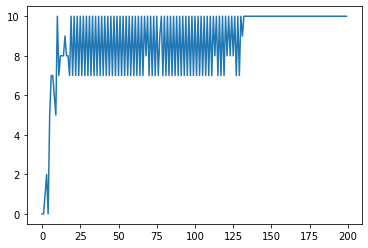

In [ ]:
for i in [0,1,2,3,4]:
 print(len(Each_node_TimeS[i]))
plt.plot(Each_node_TimeS[0])

In [ ]:
def next_pos_Thrh_SP_route(curr_node,destin_node,SP_route_dict):
  if curr_node<destin_node:
      route=SP_route_dict[(curr_node,destin_node)]
      route_=route.copy()
      #print(curr_node,destin_node,route_,"True")
  else:
      route=SP_route_dict[(destin_node,curr_node)]
      route_=route.copy()
      route_.reverse()
      #print(curr_node,destin_node,route_,"false")
  return route_[1]

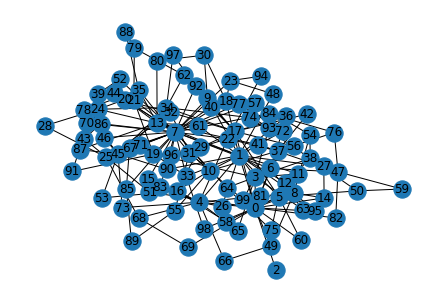

In [ ]:
nodes=100
G_nx=nx.barabasi_albert_graph(nodes,m=2,seed=2)
nx.draw(G_nx,with_labels=True)

In [ ]:
c=G_nx.edges()
c

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 8), (0, 12), (0, 14), (0, 17), (0, 49), (0, 51), (0, 60), (0, 69), (0, 82), (0, 95), (0, 98), (1, 3), (1, 4), (1, 5), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 18), (1, 26), (1, 27), (1, 33), (1, 36), (1, 48), (1, 61), (1, 72), (1, 90), (3, 6), (3, 11), (3, 19), (3, 38), (3, 56), (3, 63), (3, 64), (3, 65), (3, 93), (3, 99), (4, 15), (4, 16), (4, 22), (4, 26), (4, 65), (4, 66), (4, 68), (4, 73), (4, 81), (4, 83), (5, 17), (5, 50), (5, 58), (5, 60), (5, 75), (6, 7), (6, 47), (6, 63), (6, 72), (7, 9), (7, 10), (7, 13), (7, 15), (7, 18), (7, 19), (7, 20), (7, 21), (7, 22), (7, 23), (7, 25), (7, 33), (7, 40), (7, 44), (7, 45), (7, 46), (7, 52), (7, 57), (7, 64), (7, 67), (7, 70), (7, 71), (7, 77), (7, 83), (7, 84), (7, 85), (7, 86), (7, 92), (7, 96), (8, 14), (8, 49), (8, 54), (8, 95), (9, 30), (10, 16), (10, 31), (10, 37), (10, 55), (12, 38), (13, 20), (13, 24), (13, 25), (13, 35), (13, 41), (13, 61), (13, 

In [ ]:
Edges=G_nx.number_of_edges()

In [ ]:
import pickle
def storeData(db,file_name):
    # Its important to use binary mode
    dbfile = open(file_name, 'wb')
    # source, destination
    pickle.dump(db, dbfile)
    dbfile.close()
def loadData(file_name):
    # for reading also binary mode is important
    dbfile = open(file_name, 'rb')
    db = pickle.load(dbfile)
    dbfile.close()
    return db

In [ ]:
adjacency_list={0:[1,2,4],1:[0,5,8],2:[0,6,9],3:[5,8,9],4:[1,6],5:[1,3,7],6:[2,4],7:[5],8:[1,3],9:[2,3]}
edges=set()
for i in adjacency_list:
  for j in adjacency_list[i]:
      if i<j:
        edges.add((i,j))
      else:
        edges.add((j,i))
edges_ = list(edges)
edges
nodes_=list(adjacency_list.keys())

In [ ]:
nodes_

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
G_ig = ig.Graph(directed=False)
G_ig.add_vertices(G_nx.nodes)
G_ig.add_edges(G_nx.edges())

In [ ]:
%%time
All_pairs_nodes={}
for source in range(nodes-1):
  target_list=[i for i in range(source+1,nodes)]
  path = G_ig.get_shortest_paths(v=source, to=target_list, weights=None,output='vpath')
  paths=[*path]
  for target,route in zip(target_list,paths):
    All_pairs_nodes[(source,target)]=route
filename="N_"+str(nodes)+"_E_"+str(Edges)+"G_shortestpath"
storeData(All_pairs_nodes,filename)

NameError: ignored

In [ ]:
SP_route_dict=loadData(filename)
SP_route_dict

In [ ]:
class M_Queue:
    def __init__(self):
        self.items = []

    def is_empty(self):
        return self.items == []

    def enqueue(self, array_data):
      for i in array_data:
        self.items.append(i)

    def dequeue(self,item_no):
        return self.items.pop(item_no)
    def show(self):
       return self.items
    def queue_size(self):
       return len(self.items)

q = M_Queue()
q.is_empty()
q.enqueue([2,4,6,8,9])
q.queue_size()
q.dequeue(1)
q.show()

[2, 6, 8, 9]

In [ ]:
n_1=3
node_capacity=10
prob_gene={}
for i in range(nodes):
  prob_gene[i]=1

In [ ]:
adjacency_list,node_Degree_dict =adjacency_list_nodeDegree(G_nx,nodes)

In [ ]:
adjacency_list

#Algorithm
In a network of N nodes, on each node particles are created at every time step with probability p, with their destination chosen randomly. The particle are supposed to reached their destination via shortest path(computed using Dijkstras Algorithm) and once a particle reach their destination it is removed from the system. Particle delivering or outgoing flux is defined as

$u(n)= \bigg\{n, n<=n_1; \hspace{0.3cm} n_1, n>n_1 $
 where $n_1$ can be a function of degree of a node.

Each node can have a queue of finite length, FIFO principle is used for servicing the queue of each node.  
If the next routing node of a particle in a queue of another node is congested, then that particle is allow to stay and next particle in that queue is serviced.


In [ ]:
%%time
Each_node_queue={}
Each_node_TimeS={}
walkers_on_nodes={}
for node in range(nodes):
      Each_node_queue[node]=M_Queue()
      Each_node_TimeS[node]=[]
      walkers_on_nodes[node]=0
Time=200
for time in range(Time):
  print("time",time)
  walkers_on_nodes_dummy={}
  Each_node_queue_dummy={}
  for node in range(nodes):
    Each_node_queue_dummy[node]=Queue_list()
    walkers_on_nodes_dummy[node]=Each_node_queue[node].queue_size()
    rnum1=np.random.rand(1)[0]
    if rnum1<=prob_gene[node] and Each_node_queue[node].queue_size()<node_capacity:
      create_particle=np.random.randint(0,nodes,1)[0]
      if create_particle !=node:
         Each_node_queue[node].enqueue([create_particle])
  for node in range(nodes):
    print("current node",node)
    print("main queue at starting",[[i,Each_node_queue[i].show()] for i in range(nodes)])
    print("dummy",[[i,Each_node_queue_dummy[i].show()] for i in range(nodes)])
    if Each_node_queue[node].queue_size()>0:
        if Each_node_queue[node].queue_size()<=n_1:
          w=0
          while w<Each_node_queue[node].queue_size():
              walker_out_dest=Each_node_queue[node].show()[w]
              choosen_node=next_pos_Thrh_SP_route(node,walker_out_dest,SP_route_dict)
              print("choosen node",choosen_node)
              length_queue=Each_node_queue[choosen_node].queue_size()+Each_node_queue_dummy[choosen_node].queue_size()
              if length_queue>=node_capacity:
                  print("walker has to wait neighbouring node congested")
                  w=w+1
                  continue
              if choosen_node==walker_out_dest:
                  print("destination reached",choosen_node,walker_out_dest)
                  Each_node_queue[node].dequeue(w)
                  w=w-1
                  print("walker destroyed")
              else:
                  Each_node_queue[node].dequeue(w)
                  w=w-1
                  Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])
                  print("walker transfered",node,choosen_node)
              w=w+1
        else:
          k=0
          w=0
          while w<Each_node_queue[node].queue_size():
              walker_out_dest=Each_node_queue[node].show()[w]
              choosen_node=next_pos_Thrh_SP_route(node,walker_out_dest,SP_route_dict)
              print("choosen node",choosen_node)
              length_queue=Each_node_queue[choosen_node].queue_size()+Each_node_queue_dummy[choosen_node].queue_size()
              if length_queue>=node_capacity:
                  print("walker has to wait neighbouring node congested")
                  w=w+1
                  continue
              if   choosen_node==walker_out_dest:
                  print("destination reached",choosen_node,walker_out_dest)
                  Each_node_queue[node].dequeue(w)
                  k+=1
                  w=w-1
                  print("walker destroyed")
              else:
                  Each_node_queue[node].dequeue(w)
                  Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])
                  k+=1
                  w=w-1
                  print("walker transfered",node,choosen_node)
              w=w+1
              if k==n_1:
                break

    else:
      print("Node %d is empty",node)
      continue
    print("main queue after changes",[[i,Each_node_queue[i].show()] for i in range(nodes)])
    print("dummy",[[i,Each_node_queue_dummy[i].show()] for i in range(nodes)])
  for node in range(nodes):
    Each_node_queue[node].enqueue(Each_node_queue_dummy[node].show())
    print("Final queue of node",node,Each_node_queue[node].show())
    Each_node_TimeS[node].append(Each_node_queue[node].queue_size())
    print(Each_node_TimeS[node])

Streaming output truncated to the last 5000 lines.
choosen node 4
walker has to wait neighbouring node congested
choosen node 4
walker has to wait neighbouring node congested
choosen node 4
walker has to wait neighbouring node congested
choosen node 4
walker has to wait neighbouring node congested
choosen node 4
walker has to wait neighbouring node congested
choosen node 4
walker has to wait neighbouring node congested
choosen node 4
walker has to wait neighbouring node congested
choosen node 4
walker has to wait neighbouring node congested
choosen node 10
walker has to wait neighbouring node congested
choosen node 10
walker has to wait neighbouring node congested
main queue after changes [[0, [68, 19, 86, 1, 44, 94, 25, 17, 4, 41]], [1, [7, 89, 84, 74, 3, 23, 3, 84, 23, 46]], [2, [33, 40, 50, 76, 12, 65, 90, 74, 65, 80]], [3, [1, 46, 81, 14, 2, 51, 88, 18, 92, 26]], [4, [54, 99, 36, 8, 63, 3, 13, 69, 69, 62]], [5, [21, 30, 12, 20, 67, 97, 34, 11, 90, 95]], [6, [14, 75, 69, 98, 73, 69,

In [ ]:
len(Each_node_TimeS[0])

20

In [ ]:
congestion=[]
for i in Each_node_TimeS:
  congestion.append(Each_node_TimeS[i])
b=np.array(congestion)
b=np.where(b==node_capacity,1,0)
print(b)
s=np.zeros(Time)
for i in b:
  s+=i
s=s/nodes
s

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


array([0.03, 0.05, 0.07, 0.1 , 0.11, 0.15, 0.17, 0.19, 0.26, 0.34, 0.51,
       0.65, 0.76, 0.79, 0.83, 0.84, 0.86, 0.94, 0.97, 0.98, 0.99, 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.

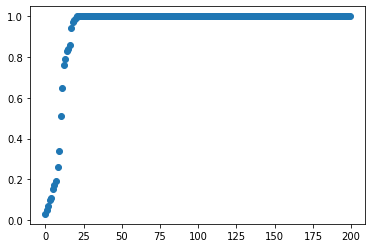

In [ ]:
plt.scatter(np.arange(Time),s)

In [ ]:
%%time
Each_node_queue={}
Each_node_TimeS={}
walkers_on_nodes={}
for node in range(nodes):
      Each_node_queue[node]=Queue_array()
      Each_node_TimeS[node]=np.array([])
      walkers_on_nodes[node]=0
for time in range(20):
  print("time",time)
  walkers_on_nodes_dummy={}
  Each_node_queue_dummy={}
  for node in range(nodes):
    Each_node_queue_dummy[node]=Queue_array()
    walkers_on_nodes_dummy[node]=Each_node_queue[node].queue_size()
    for i in range(2):
      rnum1=np.random.rand(1)[0]
      if rnum1<=prob_gene[node] and Each_node_queue[node].queue_size()<node_capacity:
        create_particle=np.random.randint(0,nodes,1)[0]
        if create_particle !=node:
          Each_node_queue[node].enqueue([create_particle])
  for node in range(nodes):
    print("current node",node)
    print("main queue at starting",[[i,Each_node_queue[i].show()] for i in range(nodes)])
    print("dummy",[[i,Each_node_queue_dummy[i].show()] for i in range(nodes)])
    if Each_node_queue[node].queue_size()>0:
        if Each_node_queue[node].queue_size()<=n_1:
          for i in range(Each_node_queue[node].queue_size()):
              walker_out_dest=Each_node_queue[node].show()[0]
              choosen_node=next_pos_Thrh_SP_route(node,walker_out_dest,SP_route_dict)[1]
              print("choosen node",choosen_node)
              length_queue=Each_node_queue[choosen_node].queue_size()+Each_node_queue_dummy[choosen_node].queue_size()
              if length_queue>=node_capacity:
                  print("walker has to go another route")
                  neighbours=adjacency_list[node].copy()
                  neighbours.remove(choosen_node)
                  if neighbours==[]:
                    print("walker has to stay as all neighbours congested")
                    break
                  walkers_on_nodes=[Each_node_queue[neighb_node].queue_size()+Each_node_queue_dummy[neighb_node].queue_size() for neighb_node in neighbours]
                  indexes=[]
                  for i in range(len(walkers_on_nodes)):
                    if walkers_on_nodes[i]==node_capacity:
                       indexes.append(i)
                  if indexes!=[]:
                    for i in indexes:
                      neighbours.pop(i)
                      walkers_on_nodes.pop(i)
                      print("neighbours,walkers",neighbours,walkers_on_nodes)
                      if neighbours==[]:
                         print("walker has to stay as all neighbours congested")
                         break
                      if  neighbours!=[]:
                          route_and_length={}
                          for j in neighbours:
                              route_and_length[len(next_pos_Thrh_SP_route(node,j,SP_route_dict))-1]=next_pos_Thrh_SP_route(node,j,SP_route_dict)
                              print(next_pos_Thrh_SP_route(node,j,SP_route_dict))
                          minimum=min([i for i in route_and_length])
                          alter_route= route_and_length[minimum]
                          alter_node=alter_route[1]
                          Each_node_queue[node].dequeue()
                          Each_node_queue_dummy[alter_node].enqueue([walker_out_dest])
                          print("walker transfered",node,alter_node)
                          continue
                      else:
                        print("walker has to stay as all neighbours congested")
                        break

              else:
                  if choosen_node==walker_out_dest:
                      print("destination reached",choosen_node,walker_out_dest)
                      Each_node_queue[node].dequeue()
                      print("walker destroyed")
                  else:
                      Each_node_queue[node].dequeue()
                      Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])
                      print("walker transfered",node,choosen_node)
        else:
          for i in range(n_1):
              walker_out_dest=Each_node_queue[node].show()[0]
              choosen_node=next_pos_Thrh_SP_route(node,walker_out_dest,SP_route_dict)[1]
              print("choosen node",choosen_node)
              length_queue=Each_node_queue[choosen_node].queue_size()+Each_node_queue_dummy[choosen_node].queue_size()
              if length_queue>=node_capacity:
                  print("walker has to go another route")
                  neighbours=adjacency_list[node].copy()
                  neighbours.remove(choosen_node)
                  walkers_on_nodes=[Each_node_queue[neighb_node].queue_size()+Each_node_queue_dummy[neighb_node].queue_size() for neighb_node in neighbours]
                  indexes=[]
                  print(walkers_on_nodes)
                  for i in range(len(walkers_on_nodes)):
                    if walkers_on_nodes[i]==node_capacity:
                       indexes.append(i)
                  if indexes!=[]:
                  for i in indexes:
                    neighbours.pop(i)
                    walkers_on_nodes.pop(i)
                    print("neighbours",neighbours)
                    print("walkers on each",walkers_on_nodes)
                  if  neighbours!=[]:
                      route_and_length={}
                      for i in neighbours:
                          route_and_length[len(next_pos_Thrh_SP_route(node,i,SP_route_dict))-1]=next_pos_Thrh_SP_route(node,i,SP_route_dict)
                      minimum=min([i for i in route_and_length])
                      alter_route= route_and_length[minimum]
                      alter_node=alter_route[1]
                      Each_node_queue[node].dequeue()
                      Each_node_queue_dummy[alter_node].enqueue([walker_out_dest])
                      print("walker transfered",node,alter_node)
                      continue
                  else:
                      print("walker has to stay as all neighbours congested")
                      break
              else:
                  if   choosen_node==walker_out_dest:
                      print("destination reached",choosen_node,walker_out_dest)
                      Each_node_queue[node].dequeue()
                      print("walker destroyed")
                  else:
                      Each_node_queue[node].dequeue()
                      Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])
                      print("walker transfered",node,choosen_node)

    else:
      print("Node %d is empty",node)
      continue
    print("main queue after changes",[[i,Each_node_queue[i].show()] for i in range(nodes)])
    print("dummy",[[i,Each_node_queue_dummy[i].show()] for i in range(nodes)])
  for node in range(nodes):
    Each_node_queue[node].enqueue(Each_node_queue_dummy[node].show())
    print("Final queue of node",node,Each_node_queue[node].show())
    Each_node_TimeS[node]=np.append(Each_node_TimeS[node],Each_node_queue[node].queue_size())
    print(Each_node_TimeS[node])

time 0
current node 0
main queue at starting [[0, array([4, 2])], [1, array([5, 2])], [2, array([4, 3])], [3, array([4, 0])], [4, array([5])], [5, array([1, 9])], [6, array([9, 3])], [7, array([5, 5])], [8, array([5, 5])], [9, array([4, 2])]]
dummy [[0, array([], dtype=int64)], [1, array([], dtype=int64)], [2, array([], dtype=int64)], [3, array([], dtype=int64)], [4, array([], dtype=int64)], [5, array([], dtype=int64)], [6, array([], dtype=int64)], [7, array([], dtype=int64)], [8, array([], dtype=int64)], [9, array([], dtype=int64)]]
choosen node 4
destination reached 4 4
walker destroyed
choosen node 2
destination reached 2 2
walker destroyed
main queue after changes [[0, array([], dtype=int64)], [1, array([5, 2])], [2, array([4, 3])], [3, array([4, 0])], [4, array([5])], [5, array([1, 9])], [6, array([9, 3])], [7, array([5, 5])], [8, array([5, 5])], [9, array([4, 2])]]
dummy [[0, array([], dtype=int64)], [1, array([], dtype=int64)], [2, array([], dtype=int64)], [3, array([], dtype=in

IndexError: ignored

In [ ]:
route_and_length
#neighbours=adjacency_list[node].copy()
neighbours,adjacency_list[8]

([1], [0, 1])

In [ ]:
a=np.append([2,3,4], 3, axis=None)
a=np.delete(a,0 , axis=0)
a

array([3, 4, 3])

In [ ]:
network_congestion=np.zeros(time)
for node in range(nodes):
  new_array=np.where(Each_node_TimeS[node]>=10,1,0)
  network_congestion=network_congestion+new_array